# KNN

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
 
from sklearn.neighbors import KNeighborsRegressor
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class KNNRegressor(BaseRegressor):
   def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="KNN"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
         
        self.model_ml= KNeighborsRegressor
        if params is None:
            self.params = {
                'n_neighbors': 5,  # Número de vecinos
                'weights': 'uniform',  # Pesos uniformes para todos los vecinos
                'p': 1
            }
        if params_space is None:
            self.params_space = {
                'n_neighbors': Integer(1, 50),        
                'weights': Categorical(['uniform', 'distance']),
                'p': Integer(1, 2)
            }



c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import pandas as pd
import numpy as np
import pickle

#file_path = 'C:/Users/felipe/Documents/Brain_Age_/dataframe_alpha.xlsx'
#save_path=f'{path}KNN/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

# Crear una instancia del modelo XGBoost
knn_model = KNNRegressor()
knn_model.set_data(X,y)

In [ ]:
opt_knn, best_params_knn = knn_model.SearchBestModel(X, y, n_iter_=1000, early_stop=False, save_result=True)
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/KNN/Modelos/opt_KNN_model_all_features.pickle', 'wb') as file:
#    pickle.dump(opt_knn, file)

In [5]:
with open(f'{path}Opt_Model/opt_KNN_model_all_features.pickle', 'rb') as file:
    opt_knn= pickle.load(file)

In [36]:
resultados = opt_knn.cv_results_
knn_model.guardar_resultados_busqueda(resultados=resultados)

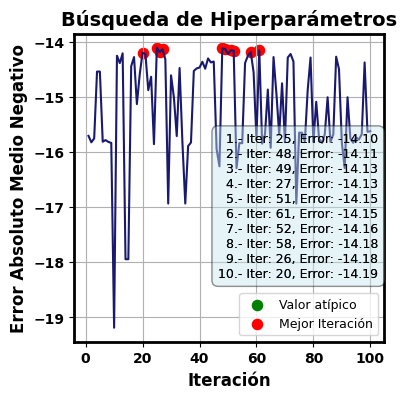

Top 1: Iteración 25, Error -14.10390772276817
Top 2: Iteración 48, Error -14.113936831738542
Top 3: Iteración 49, Error -14.128203878015038
Top 4: Iteración 27, Error -14.129986525417758
Top 5: Iteración 51, Error -14.150672648697627
Top 6: Iteración 61, Error -14.150672648697627
Top 7: Iteración 52, Error -14.156889617210364
Top 8: Iteración 58, Error -14.18355045048277
Top 9: Iteración 26, Error -14.18355045048277
Top 10: Iteración 20, Error -14.19154646682622


In [6]:
knn_model.plot_search_best_model(opt_knn, linewidth=1.5, color='midnightblue', num_max=100)

In [9]:
best_params_knn = knn_model.best_hyper(opt_knn, num_max=100)

In [10]:
best_params_knn

[{'n_neighbors': 14, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 9, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 15, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 12, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 13, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 13, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 18, 'p': 1, 'weights': 'distance'}]

# Trainer

In [11]:
results, best_model_results, best_model = knn_model.trainer(params_=best_params_knn[0])

In [33]:
#with open(f'{path}Opt_Model/BestModel_KNN_all_features.pickle', 'wb') as file:
#    pickle.dump(knn_model.model, file)
#with open(f'{path}Opt_Model/results_KNN_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)

In [31]:
knn_model.guardar_resultados_trainer(resultados=results)

In [12]:
y_pred =knn_model.predicter(knn_model.X_test)

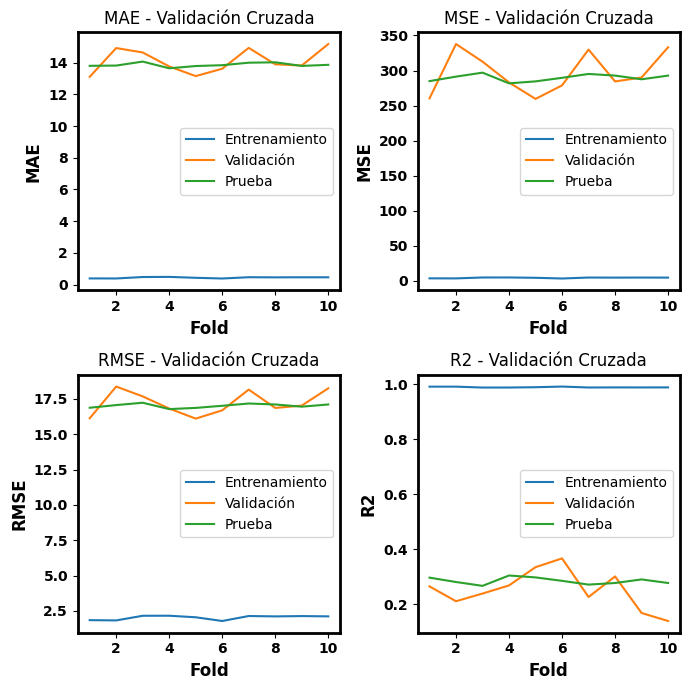

In [14]:
knn_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.52e-23
Time:                        20:28:41   Log-Likelihood:                -1007.1
No. Observations:                 276   AIC:                             2018.
Df Residuals:                     274   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8214      1.437     24.237      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


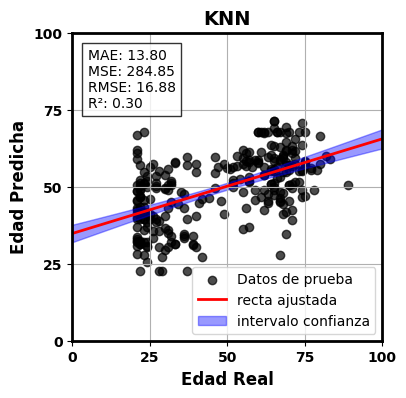

Error medio absoluto: 13.796963800646505
Error cuadrático medio: 284.846504798201
Raíz del error cuadrático medio: 16.877396268328862
Coeficiente de determinación (R²): 0.29616661798221855


In [15]:
knn_model.plot_regresion(y=y_pred,x= knn_model.y_test, label_='Datos de prueba', x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='KNN',line_ideal=False,confidence_interval=True,  color='black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [16]:
y_pred_train=knn_model.predicter(knn_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.392e+04
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:28:53   Log-Likelihood:                -3385.1
No. Observations:                1101   AIC:                             6774.
Df Residuals:                    1099   BIC:                             6784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3418      0.423      7.901      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


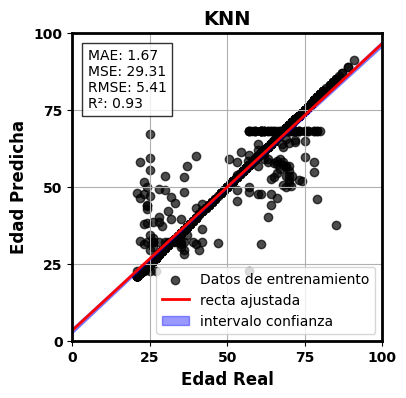

Error medio absoluto: 1.6730189219213392
Error cuadrático medio: 29.308313051218246
Raíz del error cuadrático medio: 5.413715272455529
Coeficiente de determinación (R²): 0.9268058325360309


In [17]:
knn_model.plot_regresion(y=y_pred_train,x= knn_model.y_train, label_='Datos de entrenamiento',x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='KNN',line_ideal=False,confidence_interval=True,  color='black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [18]:
residuals = knn_model.predicter(knn_model.X_train)-knn_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     75.47
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.33e-17
Time:                        20:28:57   Log-Likelihood:                -3385.1
No. Observations:                1101   AIC:                             6774.
Df Residuals:                    1099   BIC:                             6784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3418      0.423      7.901      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


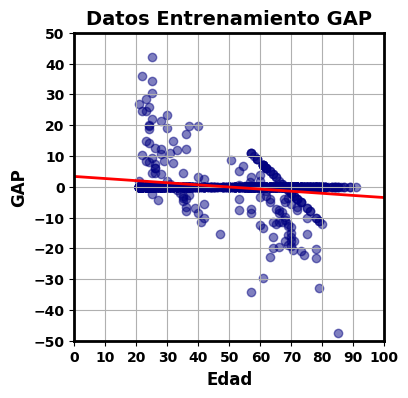

Error medio absoluto: 49.883297294204255
Error cuadrático medio: 2961.5839651238184
Raíz del error cuadrático medio: 54.420437017023474
Coeficiente de determinación (R²): -6.396218005555521


In [19]:
knn_model.plot_regresion(x=knn_model.y_train,y=residuals,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='Datos Entrenamiento GAP', xlabel='Edad', ylabel='GAP')

In [20]:
y_pred_corrected=knn_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     181.0
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           5.09e-32
Time:                        20:29:01   Log-Likelihood:                -1007.1
No. Observations:                 276   AIC:                             2018.
Df Residuals:                     274   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4796      1.437     21.911      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


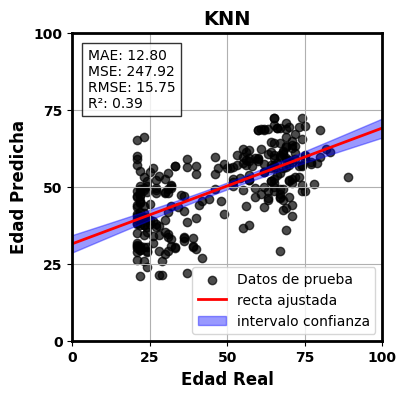

Error medio absoluto: 12.799290857265367
Error cuadrático medio: 247.9178983149884
Raíz del error cuadrático medio: 15.745408801139092
Coeficiente de determinación (R²): 0.38741430948082756


In [21]:
knn_model.plot_regresion(y=y_pred_corrected,x= knn_model.y_test, label_='Datos de prueba', x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='KNN',line_ideal=False,confidence_interval=True,  color='black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

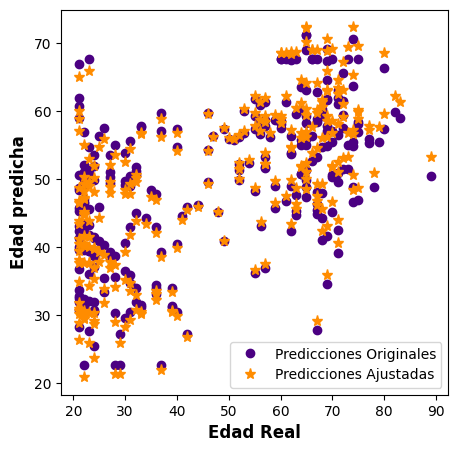

In [22]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(knn_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(knn_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [23]:
shap_values, shap_summary_sorted = knn_model.feature_importance_shap(X_test=knn_model.X_test,model=knn_model.model)

Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsRegressor(n_neighbors=14, p=1, weights='distance')


100%|██████████| 276/276 [02:15<00:00,  2.04it/s]

Importancia de características basada en suma de valores SHAP:
IAF_OCC_right: 314.4376151124872
IAF_OCC_left: 256.2643529128053
TF_MFG_left: 182.46441249733962
IAF_INS_left: 158.4283952381712
IAF_HPC_left: 156.23158911620405
IAF_MFG_left: 146.72896953017766
IAF_IFG_left: 145.81727723813674
TF_INS_right: 136.29427972127286
IAF_INS_right: 129.7119872198357
TF_HPC_left: 128.58070609299875
Low_subj_spec_EPP_PARIET_right: 126.99238249274642
TF_INS_left: 125.62525238843665
TF_MFG_right: 122.49001306270641
IAF_ORB_right: 117.0559269006971
TF_HPC_right: 113.45275199080719
TF_ORB_right: 111.0773844521809
IAF_SFG_right: 108.97394795417881
Alpha2_canon_RPD_HPC_right: 108.69445675622666
TF_SFG_right: 108.09133556337186
TF_SFG_left: 103.838911241172
IAF_IFG_right: 103.68442480346651
IAF_HPC_right: 103.57715205939094
IAF_MFG_right: 100.91633354694592
Low_subj_spec_EPP_PARIET_left: 100.90465718823292
IAF_SFG_left: 100.77950724768172
Alpha2_canon_EPP_HPC_right: 98.96491442744704
Low_subj_spec_RPD_HPC_

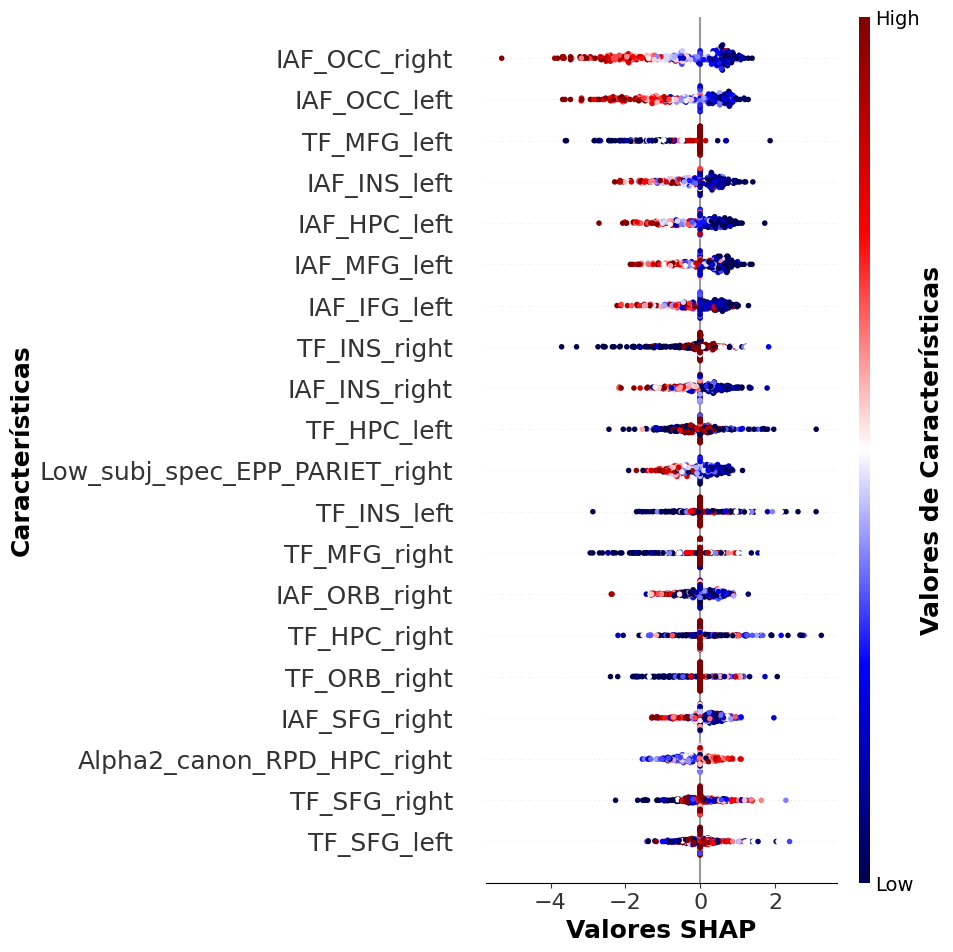

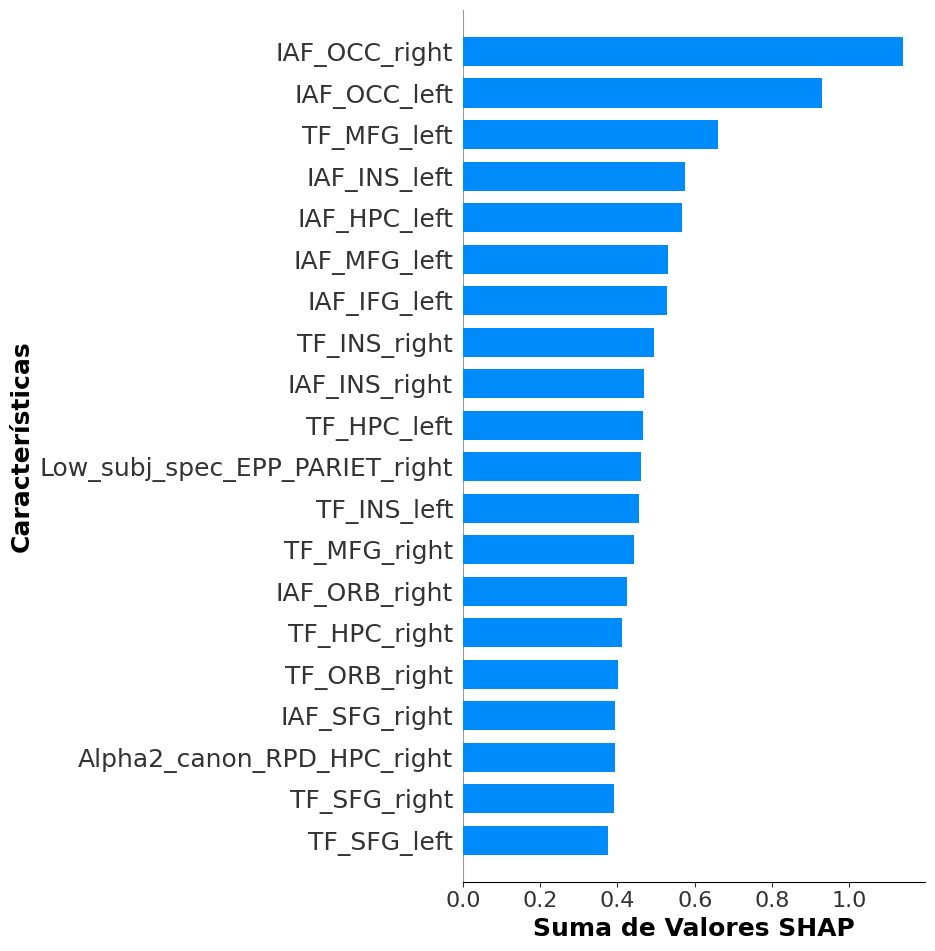

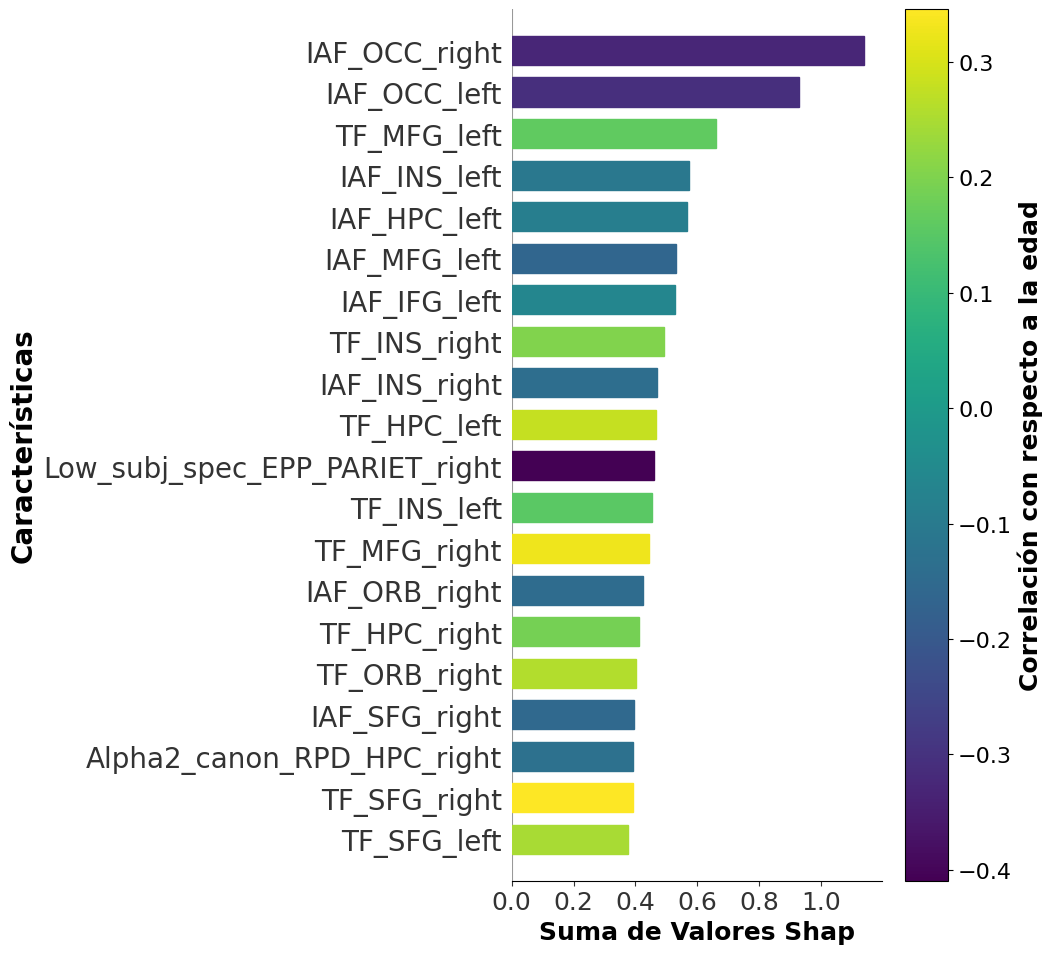

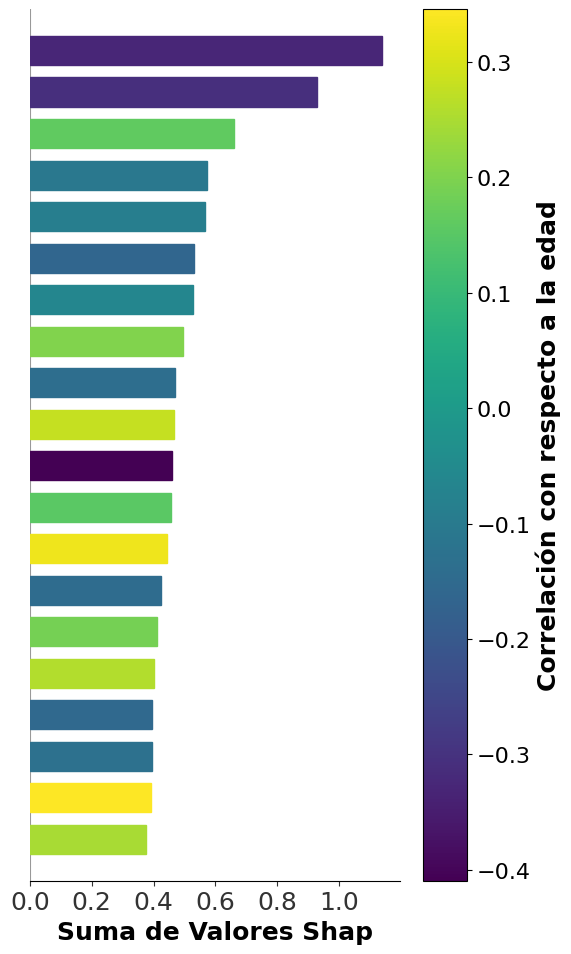

In [25]:
knn_model.plot_feature_importance(shap_values=shap_values,X_test=knn_model.X_test,y_test=knn_model.y_test)

In [ ]:
shap_summary_sorted

In [32]:
with open(f'{path}Opt_Model/shap_values_knn.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model/shap_summary_sorted_knn.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

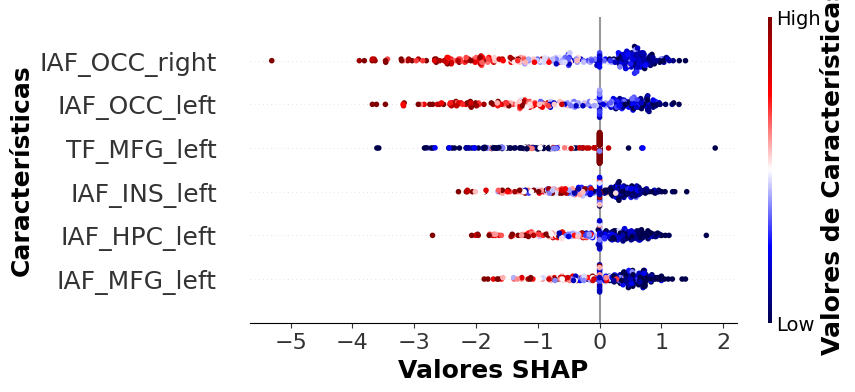

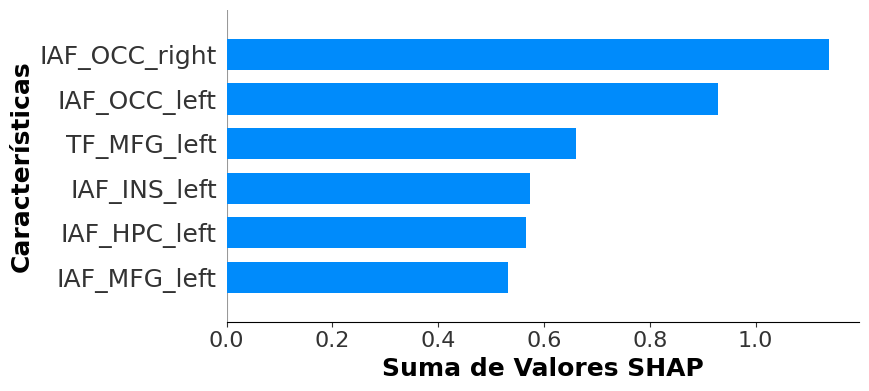

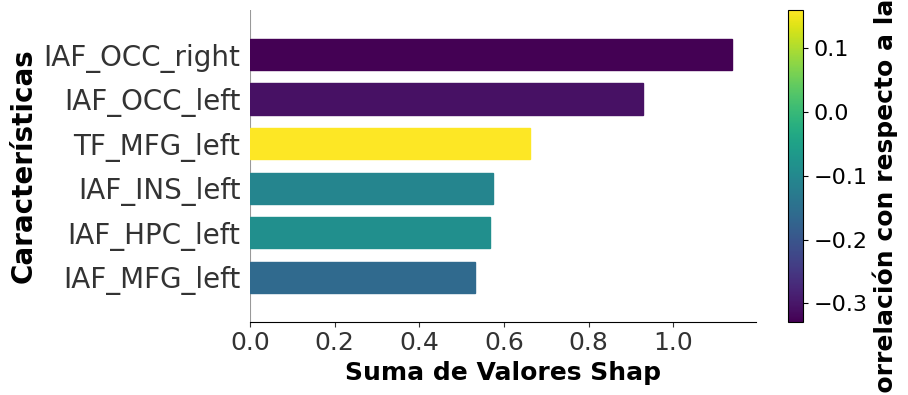

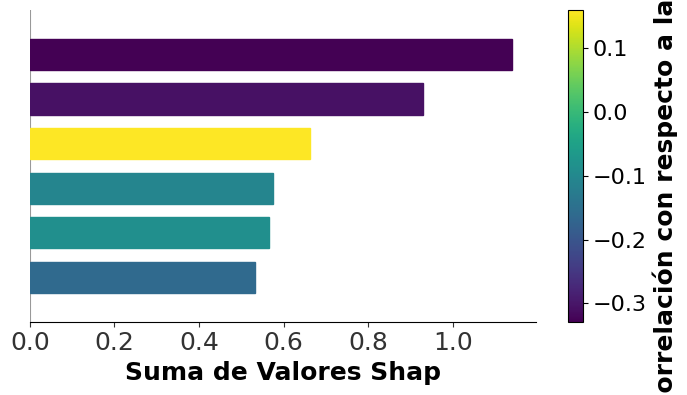

In [27]:
knn_model.plot_feature_importance(shap_values=shap_values,X_test=knn_model.X_test,y_test=knn_model.y_test, max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_knn.pickle', 'rb') as file:
    shap_summary_sorted_knn = pickle.load(file)


In [29]:
shap_por_region_sorted, resultado_normalizado_sorted=knn_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

MFG_left: 1.000000
OCC_right: 0.955176
HPC_left: 0.865182
INS_left: 0.862878
INS_right: 0.808055
OCC_left: 0.778461
ORB_right: 0.693007
HPC_right: 0.674823
SFG_right: 0.659385
IFG_left: 0.442953
PARIET_right: 0.385768
MFG_right: 0.372091
SFG_left: 0.315434


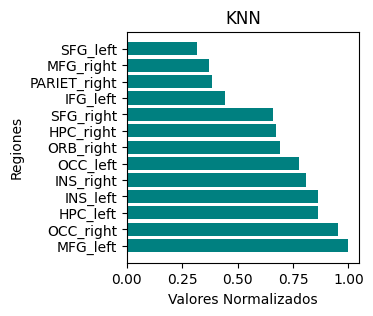

In [30]:
knn_model.plot_normalized_values(resultado_normalizado_sorted, color='teal', name_set='KNN',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


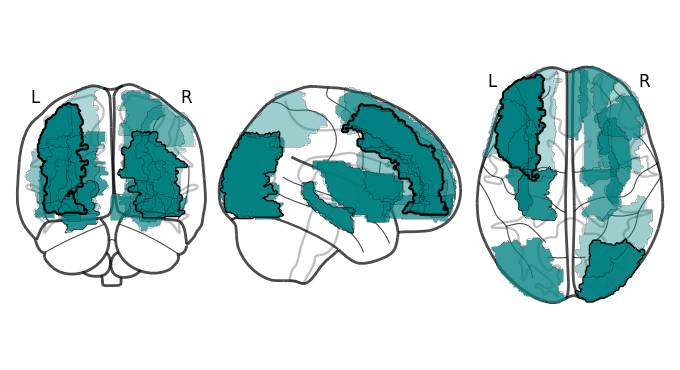

In [31]:
base_path = f'{path}cerebritos/'

knn_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='teal')

# Incremento Metricas